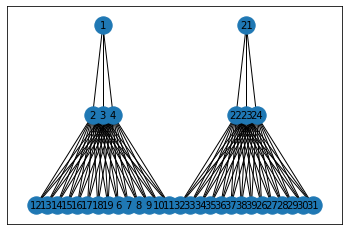

<Figure size 20000x10000 with 0 Axes>

In [55]:
# imports
# import matplotlib as plt
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph
# T = nx.generators.balanced_tree(2, 5)
T = nx.Graph()
L1 = [1]
L2 = [x for x in range(2,5)]
L3 = [x for x in range(6,20)]

L4 = [21]
L5 = [x for x in range(22,25)]
L6 = [x for x in range(26,30)]


T.add_node(1)
T.add_nodes_from(L1)
T.add_nodes_from(L2)
T.add_nodes_from(L3)
for i in range(2,5):
    T.add_edge(1,i)
    for j in range (6,20):
        T.add_edge(i,j)

T.add_node(21)
T.add_nodes_from(L4)
T.add_nodes_from(L5)
T.add_nodes_from(L6)
for i in range(22,25):
    T.add_edge(21,i)
    for j in range (26,40):
        T.add_edge(i,j)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(200,100), dpi=100)
plt.show()